# Python example: using scipy.stats.ttest_ind()

The scipy.stats.ttest_ind() function in Python's SciPy library is a convenient tool for performing an independent two-sample t-test. This function takes two arrays (a and b) representing the independent samples. A crucial parameter is equal_var, which should be set to True if equal population variances are assumed (for a standard t-test) or False for Welch's t-test, which accommodates unequal variances. The
alternative parameter can also be specified for one-tailed tests ('less' or 'greater') if the research question requires a directional hypothesis.44


In [1]:
import numpy as np
from scipy import stats

# Sample data for two independent classes (simulated scores)
class_a_scores = np.array([55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
class_b_scores = np.array([48, 77, 91, 83, 61, 59, 52, 92, 68, 90])

print(f"Class A Scores: {class_a_scores}")
print(f"Class B Scores: {class_b_scores}\n")

# Calculate sample means for context
print(f"Class A Mean: {np.mean(class_a_scores):.2f}")
print(f"Class B Mean: {np.mean(class_b_scores):.2f}\n")

# Perform independent two-sample t-test (assuming equal variances for this example)
# In a real scenario, one might first check for equal variances (e.g., Levene's test)
t_statistic, p_value = stats.ttest_ind(class_a_scores, class_b_scores, equal_var=True)

print(f"Calculated T-statistic: {t_statistic:.3f}")
print(f"Calculated P-value: {p_value:.3f}\n")

alpha = 0.05
if p_value < alpha:
    print(f"Decision: Since p-value ({p_value:.3f}) is less than alpha ({alpha}), the null hypothesis is rejected.")
    print("Conclusion: There is a statistically significant difference in average test scores between Class A and Class B.")
else:
    print(f"Decision: Since p-value ({p_value:.3f}) is greater than or equal to alpha ({alpha}), the null hypothesis is failed to be rejected.")
    print("Conclusion: There is no statistically significant difference in average test scores between Class A and Class B.")


Class A Scores: [ 55  60  65  70  75  80  85  90  95 100]
Class B Scores: [48 77 91 83 61 59 52 92 68 90]

Class A Mean: 77.50
Class B Mean: 72.10

Calculated T-statistic: 0.757
Calculated P-value: 0.459

Decision: Since p-value (0.459) is greater than or equal to alpha (0.05), the null hypothesis is failed to be rejected.
Conclusion: There is no statistically significant difference in average test scores between Class A and Class B.


# Code example: scipy.stats.ttest_rel()

The scipy.stats.ttest_rel() function in Python is used to perform a paired t-test. It takes two arrays of the same shape, a and b, representing the paired observations.54 The function returns the t-statistic and the two-tailed p-value for the test. Similar to
ttest_ind, it also has an alternative parameter for one-tailed tests.



Weight Before: [ 55  60  65  70  75  80  85  90  95 100]
Weight After:  [48 77 91 83 61 59 52 92 68 90]

Average Weight Change (After - Before): -5.40 kg

Calculated T-statistic: 0.872
Calculated P-value: 0.406

Decision: Since p-value (0.406) is greater than or equal to alpha (0.05), the null hypothesis is failed to be rejected.
Conclusion: There is no statistically significant change in average weight after the fitness program.


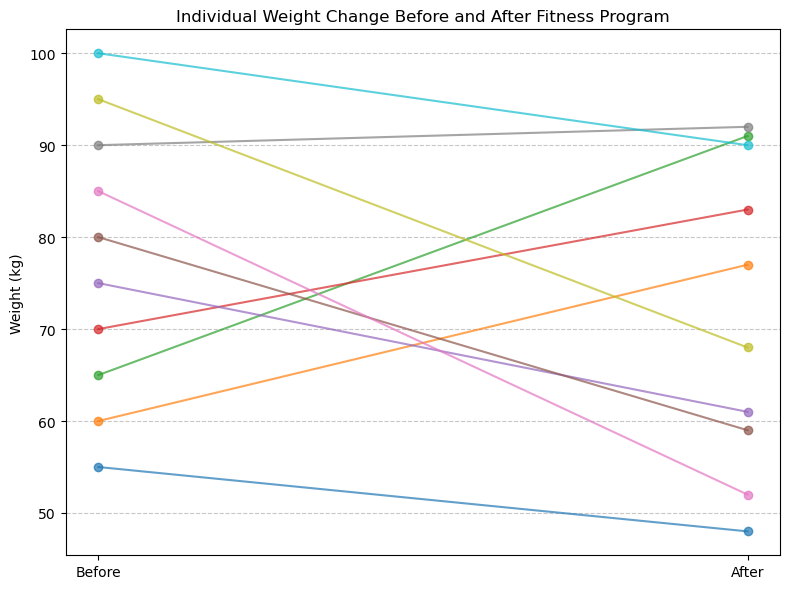

In [4]:



import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # For easier data handling and plotting

# Simulated data: Weight (in kg) before and after a fitness program for 10 individuals
weight_before = np.array([55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
weight_after = np.array([48, 77, 91, 83, 61, 59, 52, 92, 68, 90])

print(f"Weight Before: {weight_before}")
print(f"Weight After:  {weight_after}\n")

# Calculate the mean difference for context
mean_difference = np.mean(weight_after - weight_before)
print(f"Average Weight Change (After - Before): {mean_difference:.2f} kg\n")

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(weight_before, weight_after)

print(f"Calculated T-statistic: {t_statistic:.3f}")
print(f"Calculated P-value: {p_value:.3f}\n")

alpha = 0.05
if p_value < alpha:
    print(f"Decision: Since p-value ({p_value:.3f}) is less than alpha ({alpha}), the null hypothesis is rejected.")
    print("Conclusion: There is a statistically significant change in average weight after the fitness program.")
else:
    print(f"Decision: Since p-value ({p_value:.3f}) is greater than or equal to alpha ({alpha}), the null hypothesis is failed to be rejected.")
    print("Conclusion: There is no statistically significant change in average weight after the fitness program.")

# --- Visualizing Pairing (Conceptual) ---
# For a real dataset, you'd plot individual changes or distributions of differences.
# This is a conceptual visualization to illustrate the 'pairing' idea.
data = pd.DataFrame({
    'Participant': np.arange(1, len(weight_before) + 1),
    'Weight_Before': weight_before,
    'Weight_After': weight_after
})

plt.figure(figsize=(8, 6))
for i in range(len(data)):
    plt.plot(
        [0, 1], 
        [data['Weight_Before'][i], data['Weight_After'][i]], 
        'o-', alpha=0.7, label='Participant' if i == 0 else ""
    )

plt.xticks([0, 1], ['Before', 'After'])
plt.ylabel('Weight (kg)')
plt.title('Individual Weight Change Before and After Fitness Program')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Use seaborn/matplotlib to plot distributions and means

Python libraries like Matplotlib and Seaborn are powerful tools for visualizing data distributions and highlighting group differences. Density plots (smoothed histograms) are particularly effective for showing the shape, central tendency, and spread of continuous data for different groups.58 Overlapping density plots, often with transparency (alpha) settings, allow for simultaneous comparison of multiple distributions.58 Bar plots with error bars can effectively display group means and their associated variability or uncertainty (e.g., standard error or confidence intervals).60



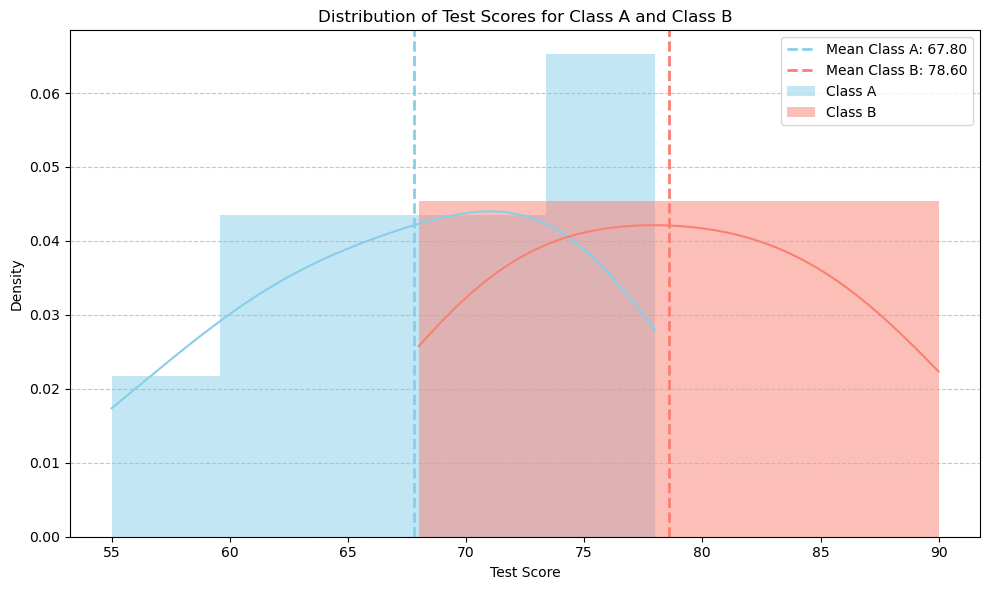

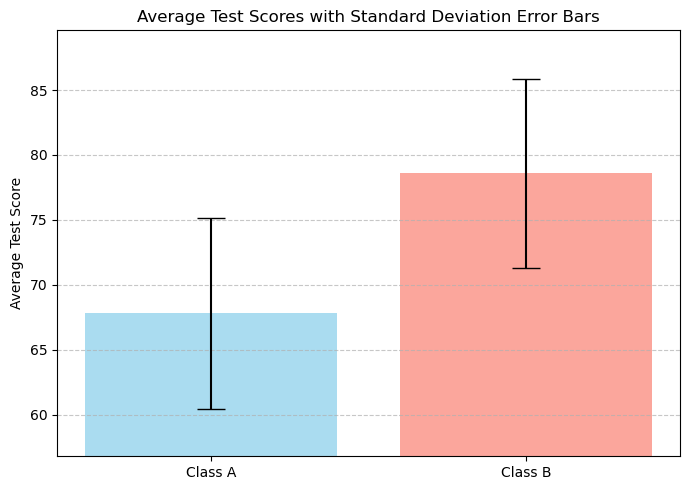

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Sample data for two independent classes
# class_a_scores = np.array([55, 60, 62, 65, 67, 70, 72, 74, 75, 78])
# class_b_scores = np.array([68, 70, 73, 75, 77, 80, 82, 84, 87, 90])

# --- Overlapping Histograms with KDE ---
plt.figure(figsize=(10, 6))

sns.histplot(class_a_scores, color="skyblue", label="Class A", kde=True, alpha=0.5, stat="density", linewidth=0)
sns.histplot(class_b_scores, color="salmon", label="Class B", kde=True, alpha=0.5, stat="density", linewidth=0)

plt.axvline(np.mean(class_a_scores), color='skyblue', linestyle='--', linewidth=2, label=f'Mean Class A: {np.mean(class_a_scores):.2f}')
plt.axvline(np.mean(class_b_scores), color='salmon', linestyle='--', linewidth=2, label=f'Mean Class B: {np.mean(class_b_scores):.2f}')

plt.title('Distribution of Test Scores for Class A and Class B')
plt.xlabel('Test Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Bar Plot with Error Bars ---
means = [np.mean(class_a_scores), np.mean(class_b_scores)]
stds = [np.std(class_a_scores, ddof=1), np.std(class_b_scores, ddof=1)]
labels = ['Class A', 'Class B']

plt.figure(figsize=(7, 5))
plt.bar(labels, means, yerr=stds, capsize=10, color=['skyblue', 'salmon'], alpha=0.7)
plt.ylabel('Average Test Score')
plt.title('Average Test Scores with Standard Deviation Error Bars')
plt.ylim(min(means) - max(stds) * 1.5, max(means) + max(stds) * 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The first plot, using overlapping histograms and kernel density estimates (KDEs), visually represents the entire distribution of scores for both classes. The distinct separation between the peaks and the minimal overlap suggest a notable difference in average scores. The vertical dashed lines clearly mark the mean score for each class, reinforcing the visual separation. The second plot, a bar chart with error bars, provides a more concise summary, showing the mean score for each class and using the standard deviation as an indicator of variability around that mean. The error bars visually represent the spread of data within each group. Together, these visualizations offer a compelling graphical representation of the differences that a t-test numerically evaluates.

# Python example: scipy.stats.f_oneway()

The scipy.stats.f_oneway() function in Python is used to perform a one-way ANOVA. It takes multiple arrays as arguments, each representing a different group's sample measurements.



In [19]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Simulated data: Test scores from students in three different schools
school_x_scores = np.random.randint(60, 81, size=30)  
school_y_scores = np.random.randint(70, 91, size=30) 
school_z_scores = np.random.randint(75, 96, size=30)  

print(f"School X Scores: {school_x_scores}\n")
print(f"School Y Scores: {school_y_scores}\n")
print(f"School Z Scores: {school_z_scores}\n\n")

# Calculate sample means for context
print(f"School X Mean: {np.mean(school_x_scores):.2f}")
print(f"School Y Mean: {np.mean(school_y_scores):.2f}")
print(f"School Z Mean: {np.mean(school_z_scores):.2f}\n")

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(school_x_scores, school_y_scores, school_z_scores)

print(f"Calculated F-statistic: {f_statistic:.3f}")
print(f"Calculated P-value: {p_value:.3f}\n")

alpha = 0.05
if p_value < alpha:
    print(f"Decision: Since p-value ({p_value:.3f}) is less than alpha ({alpha}), the null hypothesis is rejected.")
    print("Conclusion: There is a statistically significant difference in average test scores among the three schools.")
    print("Note: ANOVA does not tell which specific schools differ. Post-hoc tests are needed for that.")
else:
    print(f"Decision: Since p-value ({p_value:.3f}) is greater than or equal to alpha ({alpha}), the null hypothesis is failed to be rejected.")
    print("Conclusion: There is no statistically significant difference in average test scores among the three schools.")



School X Scores: [79 79 64 61 63 61 62 64 73 62 67 62 66 61 71 80 64 74 77 78 66 68 74 68
 78 72 61 67 66 63]

School Y Scores: [79 85 73 89 86 88 72 77 76 74 84 81 76 77 70 72 82 70 90 79 78 77 84 75
 86 86 82 72 84 71]

School Z Scores: [95 87 83 89 77 87 79 89 93 79 84 87 84 89 81 87 88 78 77 86 92 81 88 84
 86 80 75 83 76 92]


School X Mean: 68.37
School Y Mean: 79.17
School Z Mean: 84.53

Calculated F-statistic: 57.072
Calculated P-value: 0.000

Decision: Since p-value (0.000) is less than alpha (0.05), the null hypothesis is rejected.
Conclusion: There is a statistically significant difference in average test scores among the three schools.
Note: ANOVA does not tell which specific schools differ. Post-hoc tests are needed for that.


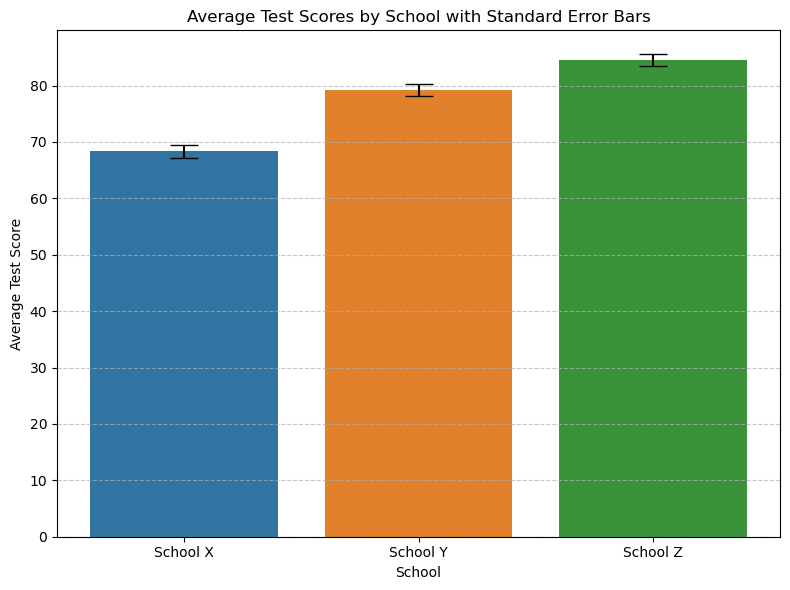

In [22]:

# --- Organize data for plotting ---
data_for_plot = pd.DataFrame({
    'School': ['School X'] * len(school_x_scores) + ['School Y'] * len(school_y_scores) + ['School Z'] * len(school_z_scores),
    'Score': np.concatenate([school_x_scores, school_y_scores, school_z_scores])
})

# Calculate group means and standard errors (sem = standard error of the mean)
group_stats = data_for_plot.groupby('School')['Score'].agg(['mean', 'sem']).reset_index()
group_stats.columns = ['School', 'Mean_Score', 'SE_Score']

# --- Bar Plot with Standard Error Bars ---
plt.figure(figsize=(8, 6))
sns.barplot(data=group_stats, x='School', y='Mean_Score', capsize=0.1, legend=False, hue = 'School')
plt.errorbar(x=np.arange(len(group_stats)), y=group_stats['Mean_Score'], 
             yerr=group_stats['SE_Score'], fmt='none', c='black', capsize=10)

plt.title('Average Test Scores by School with Standard Error Bars')
plt.xlabel('School')
plt.ylabel('Average Test Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The output of f_oneway() provides the F-statistic and the p-value. A small p-value (e.g., less than 0.05) indicates that the observed differences in means across the schools are unlikely to be due to random chance, leading to the rejection of the null hypothesis that all school means are equal. The accompanying bar plot visually reinforces this, showing the mean score for each school and using standard error bars to represent the variability. If the means are clearly separated beyond the overlap of their error bars, it supports the statistical finding of a significant difference.


# Python example: statsmodels.stats.multicomp.pairwise_tukeyhsd

The statsmodels library in Python provides robust tools for post-hoc analysis, including Tukey's HSD. The pairwise_tukeyhsd() function is particularly useful for this purpose.



Data for Tukey HSD:
    Score    School
0     79  School X
1     79  School X
2     64  School X
3     61  School X
4     63  School X 
...

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
School X School Y     10.8    0.0  7.1245 14.4755   True
School X School Z  16.1667    0.0 12.4912 19.8421   True
School Y School Z   5.3667 0.0022  1.6912  9.0421   True
--------------------------------------------------------


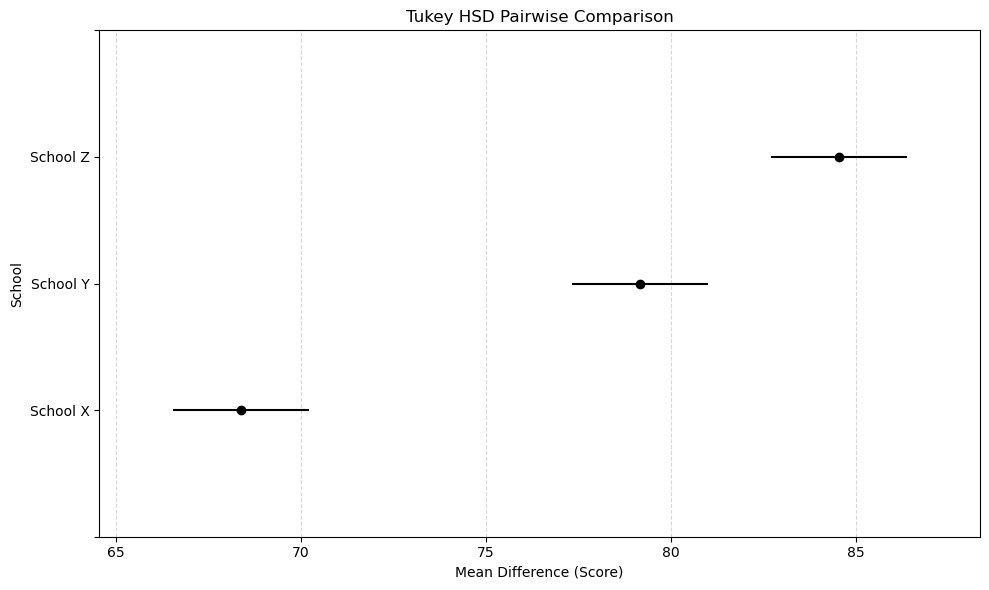

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all data into a single DataFrame
all_scores = np.concatenate([school_x_scores, school_y_scores, school_z_scores])
group_labels = (
    ['School X'] * len(school_x_scores) +
    ['School Y'] * len(school_y_scores) +
    ['School Z'] * len(school_z_scores)
)

data_df = pd.DataFrame({'Score': all_scores, 'School': group_labels})

print("Data for Tukey HSD:\n", data_df.head(), "\n...\n")

# --- Perform Tukey HSD post-hoc test ---
tukey_result = pairwise_tukeyhsd(endog=data_df['Score'], groups=data_df['School'], alpha=0.05)

print(tukey_result)

# --- Plot the pairwise comparisons ---
tukey_result.plot_simultaneous(ylabel="School", xlabel="Mean Difference (Score)")
plt.title("Tukey HSD Pairwise Comparison")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The pairwise_tukeyhsd() function takes the endog (response variable) and groups as input. The
alpha parameter sets the family-wise error rate. The printed tukey_result table displays the mean difference for each pair, a confidence interval for the difference, and the adjusted p-value. If the adjusted p-value for a pair is less than alpha, that specific pair of groups is considered significantly different. The plot_simultaneous() method provides a visual representation of these confidence intervals, making it easy to see which pairs have confidence intervals that do not include zero (indicating a significant difference).
